# KNN experiment on iris dataset

In this notebook we will experiment with KNN algorithm on iris dataset. We will use the scikit-learn library to implement the KNN algorithm.

One interesting experiment here is to see what happens when we run hyperparameter tuning on repeated samples of the training and validation datasets, and then plotting the best parameters distribution.
This technique is essentially the bootstrap method [https://en.wikipedia.org/wiki/Bootstrapping_(statistics)](bootstrapping) applied to estimating the hyperparameters of a model.

## Preparing the data

In [3]:
from sklearn import datasets
import pandas as pd

from typing import List

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to make jupyter print all outputs, not just the last one
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from plotnine import *
import random

In [4]:
iris_data = datasets.load_iris()
iris = pd.DataFrame(iris_data["data"])
iris.columns = iris_data["feature_names"]
iris_target = pd.Series(iris_data["target"])

In [5]:
n_obs = iris.shape[0]
print("Total n obs", n_obs)
n_obs_fitting = round(n_obs * 0.8)
print("n obs fitting", n_obs_fitting)
n_obs_validation = round(n_obs_fitting * 0.2)
print("n obs validation", n_obs_validation)
print("n obs train", n_obs_fitting - n_obs_validation)

Total n obs 150
n obs fitting 120
n obs validation 24
n obs train 96


In [6]:
# shuffling data to generate the datasets
indices = iris.index.tolist()
random.Random(5473).shuffle(indices) # fixing the random seed
fitting_indices = indices[:n_obs_fitting]
validation_indices = fitting_indices[-n_obs_validation:]
train_indices: List[int] = [x for x in fitting_indices if x not in validation_indices]
test_indices = [x for x in iris.index if x not in fitting_indices]

In [7]:
assert len(train_indices) + len(validation_indices) + len(test_indices) == n_obs # making sure number of obs are correct

## (manual) grid search

In [8]:
# k grid values 
k_grid = [x for x in range(1, 40)]
# distance metric values
distances_grid = ["minkowski", "cosine"]

# create all combinations of hyperparameters
hyperparameters_combos = []
for k in k_grid:
    for d in distances_grid:
        hyperparameters_combos.append( (k, d) )
hyperparameters_combos

[(1, 'minkowski'),
 (1, 'cosine'),
 (2, 'minkowski'),
 (2, 'cosine'),
 (3, 'minkowski'),
 (3, 'cosine'),
 (4, 'minkowski'),
 (4, 'cosine'),
 (5, 'minkowski'),
 (5, 'cosine'),
 (6, 'minkowski'),
 (6, 'cosine'),
 (7, 'minkowski'),
 (7, 'cosine'),
 (8, 'minkowski'),
 (8, 'cosine'),
 (9, 'minkowski'),
 (9, 'cosine'),
 (10, 'minkowski'),
 (10, 'cosine'),
 (11, 'minkowski'),
 (11, 'cosine'),
 (12, 'minkowski'),
 (12, 'cosine'),
 (13, 'minkowski'),
 (13, 'cosine'),
 (14, 'minkowski'),
 (14, 'cosine'),
 (15, 'minkowski'),
 (15, 'cosine'),
 (16, 'minkowski'),
 (16, 'cosine'),
 (17, 'minkowski'),
 (17, 'cosine'),
 (18, 'minkowski'),
 (18, 'cosine'),
 (19, 'minkowski'),
 (19, 'cosine'),
 (20, 'minkowski'),
 (20, 'cosine'),
 (21, 'minkowski'),
 (21, 'cosine'),
 (22, 'minkowski'),
 (22, 'cosine'),
 (23, 'minkowski'),
 (23, 'cosine'),
 (24, 'minkowski'),
 (24, 'cosine'),
 (25, 'minkowski'),
 (25, 'cosine'),
 (26, 'minkowski'),
 (26, 'cosine'),
 (27, 'minkowski'),
 (27, 'cosine'),
 (28, 'minkowski'),

In [9]:
hyperparameter_tuning_results = {}

def fit_knn_model(X_train, y_train, k, metric):
    scaler = StandardScaler()
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    X_scaled = scaler.fit_transform(X_train)
    _ = knn.fit(X_scaled, y_train)
    return knn, scaler

for combo in hyperparameters_combos:
    X_train = iris[iris.index.isin(train_indices)]
    y_train = iris_target[iris_target.index.isin(train_indices)]
    knn, scaler = fit_knn_model(X_train, y_train, combo[0], combo[1])

    X_validation = iris[iris.index.isin(validation_indices)]
    X_validation_scaled = scaler.transform(X_validation)
    y_validation = iris_target[iris.index.isin(validation_indices)]
    y_hat_validation = knn.predict(X_validation_scaled)

    score = f1_score(y_validation, y_hat_validation, average="macro")
    hyperparameter_tuning_results[combo] = {
        "score": score
    }

In [10]:
hyperparameter_tuning_results

best_combo = None
best_score = 0
for combo in hyperparameter_tuning_results:
    score = hyperparameter_tuning_results[combo]['score']
    if score >= best_score:
        best_score = score
        best_combo = combo
best_score
best_combo

{(1, 'minkowski'): {'score': np.float64(0.9658994032395567)},
 (1, 'cosine'): {'score': np.float64(0.9326599326599326)},
 (2, 'minkowski'): {'score': np.float64(0.9326599326599326)},
 (2, 'cosine'): {'score': np.float64(0.899749373433584)},
 (3, 'minkowski'): {'score': np.float64(0.9326599326599326)},
 (3, 'cosine'): {'score': np.float64(0.8976982097186701)},
 (4, 'minkowski'): {'score': np.float64(0.9665831244778612)},
 (4, 'cosine'): {'score': np.float64(0.8976982097186701)},
 (5, 'minkowski'): {'score': np.float64(0.9658994032395567)},
 (5, 'cosine'): {'score': np.float64(0.9305555555555555)},
 (6, 'minkowski'): {'score': np.float64(0.9658994032395567)},
 (6, 'cosine'): {'score': np.float64(0.8976982097186701)},
 (7, 'minkowski'): {'score': np.float64(0.9305555555555555)},
 (7, 'cosine'): {'score': np.float64(0.9305555555555555)},
 (8, 'minkowski'): {'score': np.float64(0.9326599326599326)},
 (8, 'cosine'): {'score': np.float64(0.899749373433584)},
 (9, 'minkowski'): {'score': np.fl

np.float64(1.0)

(21, 'minkowski')

In [11]:
scores = []
for combo in hyperparameter_tuning_results:
    scores.append( (combo[0], combo[1], hyperparameter_tuning_results[combo]["score"]) )
scores_df = pd.DataFrame(scores, columns=["k", "metric", "score"])

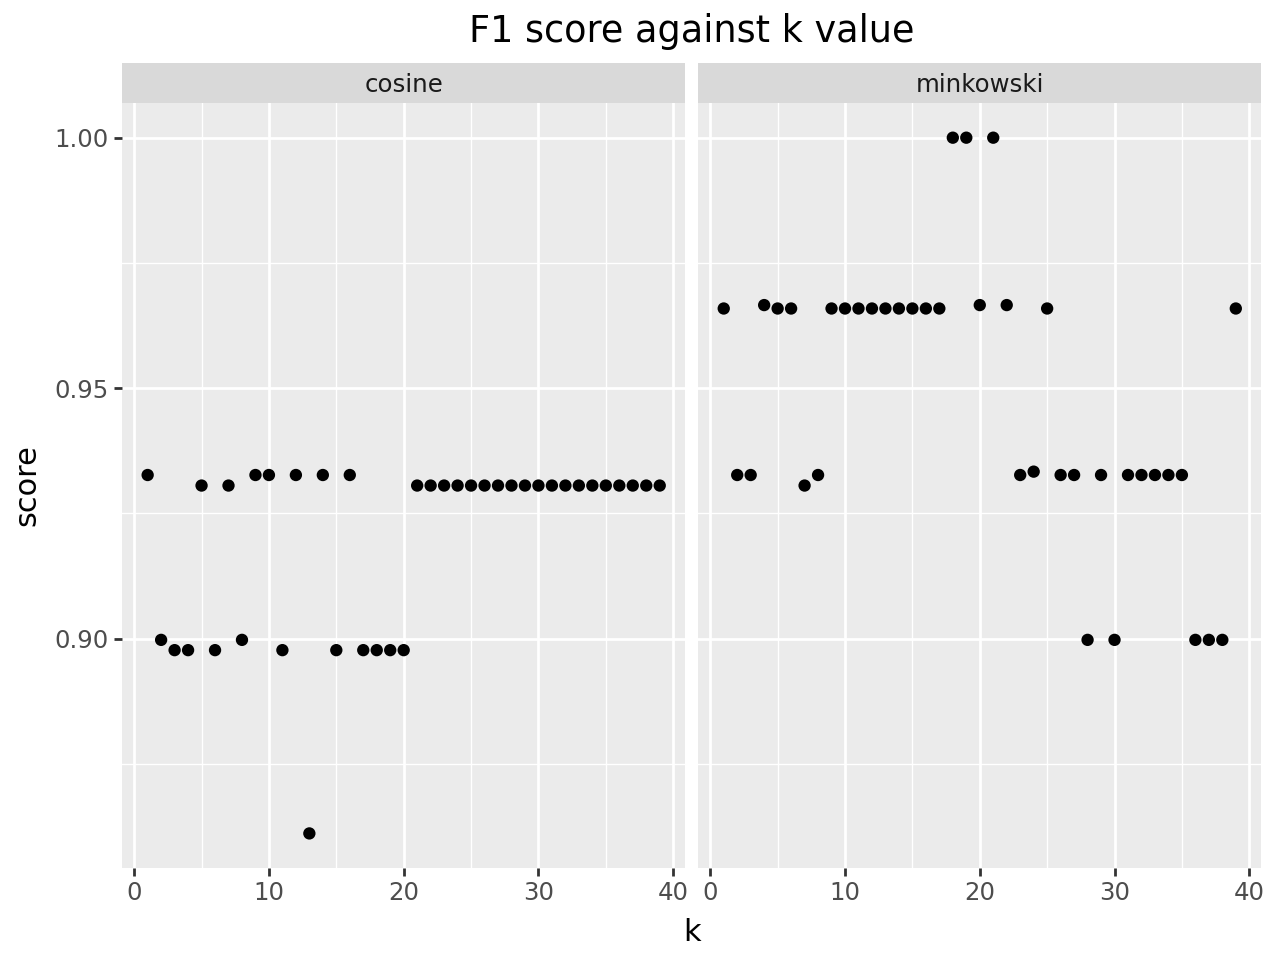

In [12]:
(
    ggplot(scores_df, aes(x="k", y="score")) +
    geom_point() +
    facet_wrap("metric") +
    ggtitle("F1 score against k value")
)

## Final model

In [13]:
X_fitting = iris[iris.index.isin(fitting_indices)]
y_fitting = iris_target[iris_target.index.isin(fitting_indices)]

final_knn, scaler = fit_knn_model(X_fitting, y_fitting, best_combo[0], best_combo[1]) #type: ignore

X_test = iris[iris.index.isin(test_indices)]
X_test_scaled = scaler.transform(X_test)
y_hat_test = final_knn.predict(X_test_scaled)
final_score = f1_score(iris_target[iris_target.index.isin(test_indices)], y_hat_test, average="macro")
final_score

np.float64(0.9568151147098515)

## Experiment: repeated sampling validation

We can see what happens if we repeately sample different train and validation datasets so as to perform hypertuning on different samplings, and then plot the results.

In [14]:
def do_grid_search():
    # shuffling data to generate the datasets
    indices = iris.index.tolist()
    random.shuffle(indices) # fixing the random seed
    fitting_indices = indices[:n_obs_fitting]
    validation_indices = fitting_indices[-n_obs_validation:]
    train_indices: List[int] = [x for x in fitting_indices if x not in validation_indices]

    # k grid values 
    k_grid = [x for x in range(1, 40)]
    # distance metric values
    distances_grid = ["minkowski", "cosine"]

    # create all combinations of hyperparameters
    hyperparameters_combos = []
    for k in k_grid:
        for d in distances_grid:
            hyperparameters_combos.append( (k, d) )

    hyperparameter_tuning_results = {}

    def fit_knn_model(X_train, y_train, k, metric):
        scaler = StandardScaler()
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        X_scaled = scaler.fit_transform(X_train)
        _ = knn.fit(X_scaled, y_train)
        return knn, scaler

    for combo in hyperparameters_combos:
        X_train = iris[iris.index.isin(train_indices)]
        y_train = iris_target[iris_target.index.isin(train_indices)]
        knn, scaler = fit_knn_model(X_train, y_train, combo[0], combo[1])

        X_validation = iris[iris.index.isin(validation_indices)]
        X_validation_scaled = scaler.transform(X_validation)
        y_validation = iris_target[iris.index.isin(validation_indices)]
        y_hat_validation = knn.predict(X_validation_scaled)

        score = f1_score(y_validation, y_hat_validation, average="macro")
        hyperparameter_tuning_results[combo] = {
            "score": score
        }

    best_combo = None
    best_score = 0
    for combo in hyperparameter_tuning_results:
        score = hyperparameter_tuning_results[combo]['score']
        if score >= best_score:
            best_score = score
            best_combo = combo
    return (best_combo[0], best_combo[1], best_score) # type: ignore

counter = 0
best_combos = []
while counter < 500:
    best_combos.append(do_grid_search())
    counter = counter + 1

In [15]:
best_combos_df = pd.DataFrame(best_combos, columns=["k", "metric", "score"])

/home/rpinosio/miniconda3/envs/ddb_ai_tutorial/lib/python3.13/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.


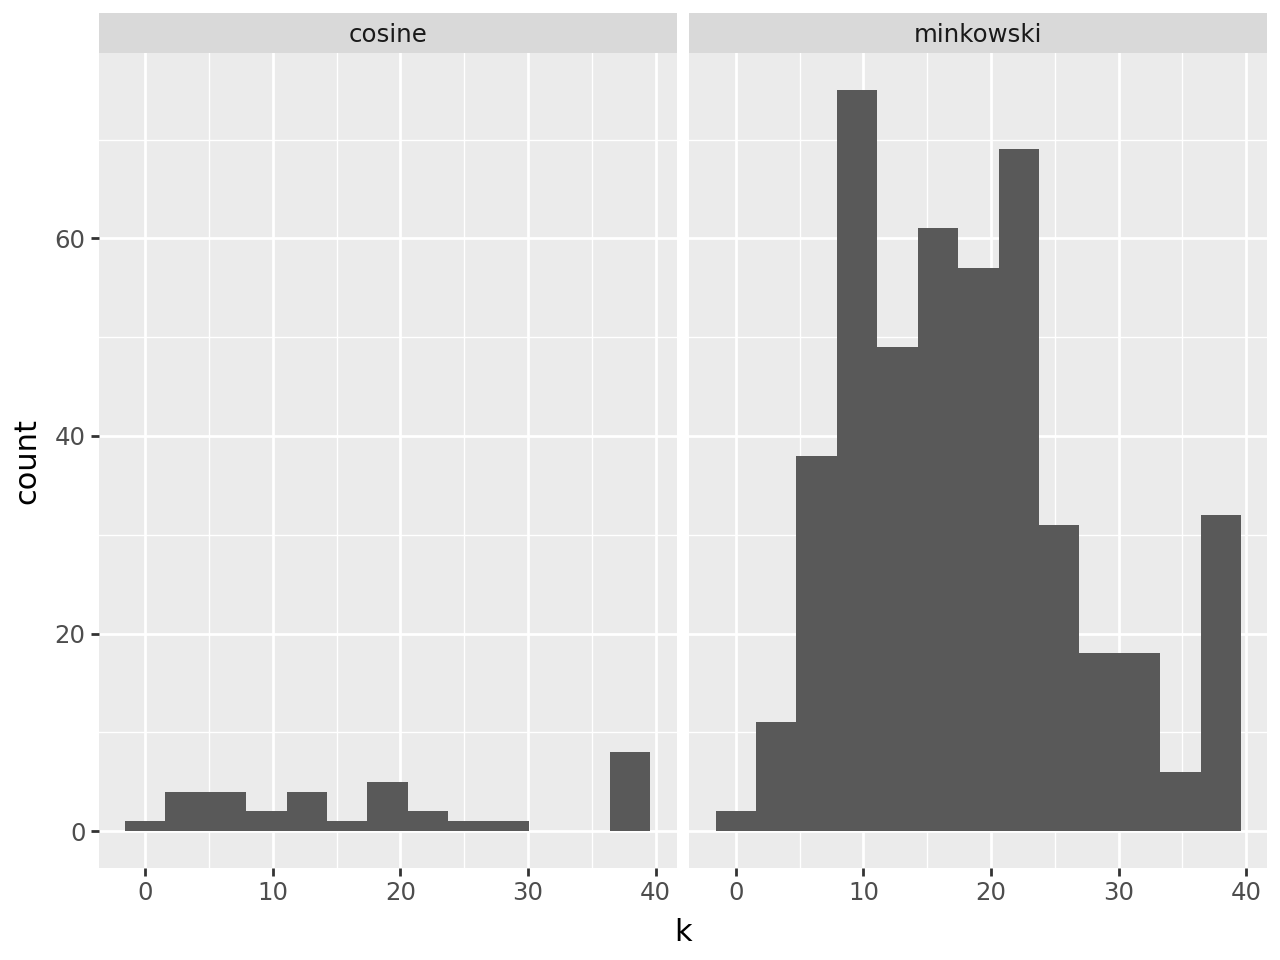

In [16]:
(
    ggplot(best_combos_df, aes(x="k")) +
    geom_histogram() +
    facet_wrap("metric")
)

/home/rpinosio/miniconda3/envs/ddb_ai_tutorial/lib/python3.13/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.


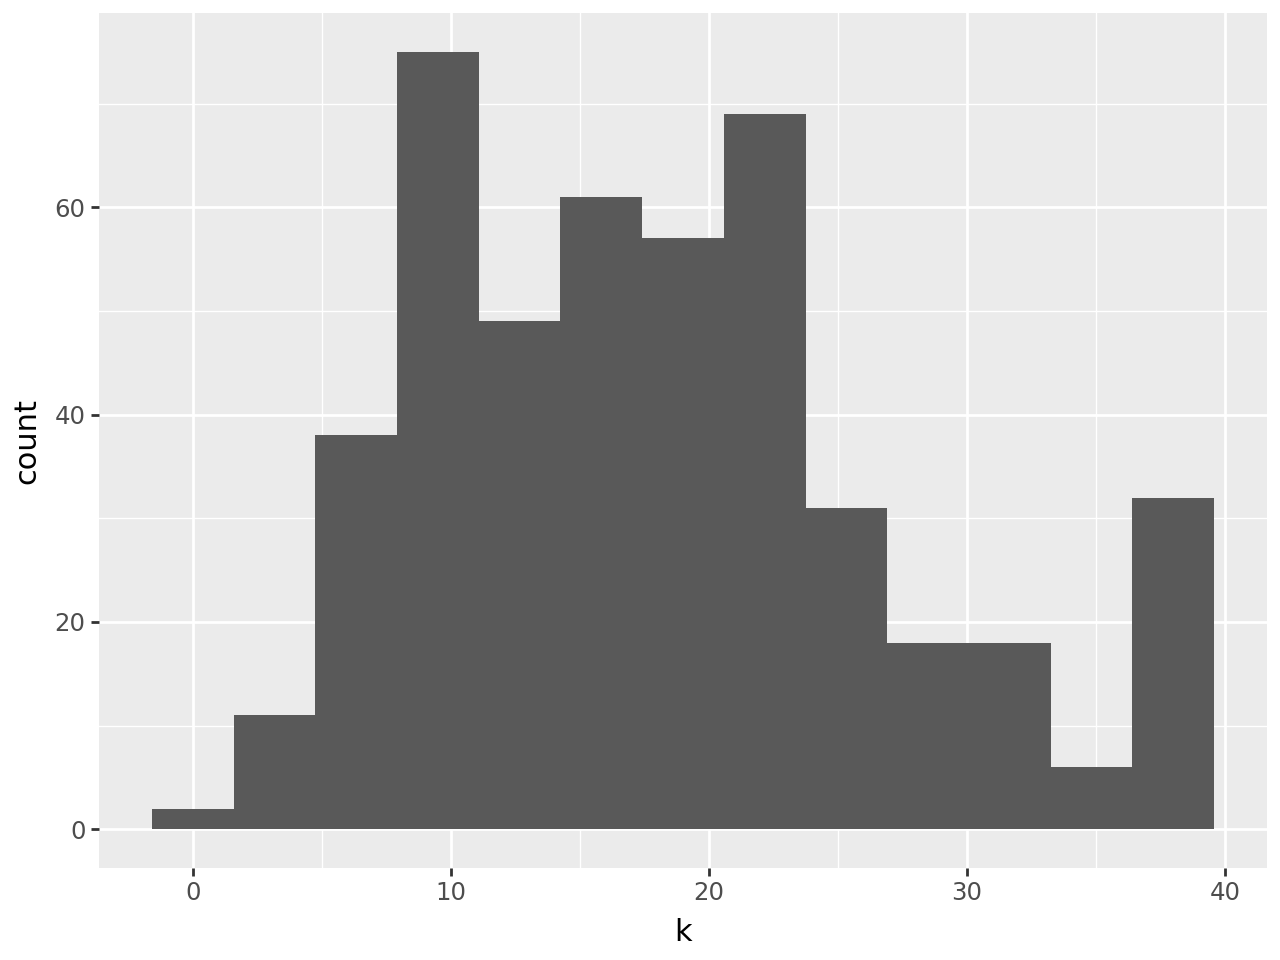

In [17]:
(
    ggplot(best_combos_df.loc[lambda x: x.metric == "minkowski"], aes(x="k")) +
    geom_histogram()
)